#**Engibot - ChatBot Informasi Akademik Fakultas Teknik UNIB**
Anggota Kelompok
1. Seprina Dwi Cahyani (G1A021010)
2. Redo Hariyadi (G1A021034)
3. Afzal Alfaraz (G1A021098)

# Install Package

In [2]:
!pip install transformers

In [3]:
!pip install gcsfs
!pip uninstall gcsfs fsspec huggingface-hub transformers peft -y
!pip install fsspec==2024.10.0
!pip install huggingface-hub>=0.25.0

Found existing installation: gcsfs 2024.10.0
Uninstalling gcsfs-2024.10.0:
  Successfully uninstalled gcsfs-2024.10.0
Found existing installation: fsspec 2024.10.0
Uninstalling fsspec-2024.10.0:
  Successfully uninstalled fsspec-2024.10.0
Found existing installation: huggingface-hub 0.27.0
Uninstalling huggingface-hub-0.27.0:
  Successfully uninstalled huggingface-hub-0.27.0
Found existing installation: transformers 4.47.1
Uninstalling transformers-4.47.1:
  Successfully uninstalled transformers-4.47.1
Found existing installation: peft 0.14.0
Uninstalling peft-0.14.0:
  Successfully uninstalled peft-0.14.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires gcsfs>=2023.3.0, which is not installed.
ERROR: pip's dependency resolver does not currently take into ac

In [5]:
!pip install indoNLP
!pip install nlp-id
!pip install peft

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=cb12557fe31b3a8ad06efaf5696e8dead8e06c0b2355bdc2653c31022c13b929
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0
ERROR: pip's dependency resolver does not currently take into account all the pac

In [44]:
import json
import nltk
import time
import random
import re
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nlp_id.lemmatizer import Lemmatizer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [7]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Preprocessing Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
with open('/content/drive/MyDrive/Akademik.json') as content:
    data = json.load(content)

In [76]:
# Menyiapkan daftar kosong untuk menyimpan hasil pemrosesan
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!', '.', '“', '”', '(', ')', ',', '’', '/', '\\']

In [79]:
# Menyiapkan data pelatihan dengan ekstraksi pola, tag, dan respons dari dataset JSON.

for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])
        for pattern in intent['patterns']:
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            documents.append((w, intent['tag']))
            if intent['tag'] not in classes:
                classes.append(intent['tag'])

data = pd.DataFrame({"patterns": inputs, "tags": tags})

print(words)

['Apa', 'itu', 'EngiBot', '?', 'Siapa', 'EngiBot', '?', 'Apa', 'yang', 'bisa', 'dilakukan', 'EngiBot', '?', 'Apa', 'fungsi', 'EngiBot', '?', 'EngiBot', 'itu', 'apa', '?', 'Ceritakan', 'tentang', 'EngiBot', 'Bisa', 'jelaskan', 'EngiBot', '?', 'Apa', 'manfaat', 'EngiBot', '?', 'Apa', 'itu', 'EngiBot', '?', 'Siapa', 'EngiBot', '?', 'Apa', 'yang', 'bisa', 'dilakukan', 'EngiBot', '?', 'Apa', 'fungsi', 'EngiBot', '?', 'EngiBot', 'itu', 'apa', '?', 'Ceritakan', 'tentang', 'EngiBot', 'Bisa', 'jelaskan', 'EngiBot', '?', 'Apa', 'manfaat', 'EngiBot', '?', 'Apa', 'itu', 'EngiBot', '?', 'Siapa', 'EngiBot', '?', 'Apa', 'yang', 'bisa', 'dilakukan', 'EngiBot', '?', 'Apa', 'fungsi', 'EngiBot', '?', 'EngiBot', 'itu', 'apa', '?', 'Ceritakan', 'tentang', 'EngiBot', 'Bisa', 'jelaskan', 'EngiBot', '?', 'Apa', 'manfaat', 'EngiBot', '?', 'Apa', 'itu', 'EngiBot', '?', 'Siapa', 'EngiBot', '?', 'Apa', 'yang', 'bisa', 'dilakukan', 'EngiBot', '?', 'Apa', 'fungsi', 'EngiBot', '?', 'EngiBot', 'itu', 'apa', '?', 'Cer

In [80]:
# Mengurutkan dan menghilangkan duplikat tag kelas untuk mendapatkan daftar kelas yang unik.

classes = sorted(list(set(classes)))
print(len(classes), "classes", classes)

144 classes ['fasilitas_fakultas', 'goodbye', 'greeting', 'informasi_akademik', 'introduksi_engibot', 'kegiatan_fakultas', 'kegiatan_ormawa', 'khs_access_issue', 'khs_check_portal', 'khs_contact_help', 'khs_content', 'khs_definition', 'khs_download', 'khs_edit_request', 'khs_error', 'khs_grades_format', 'khs_graduation_requirement', 'khs_ip', 'khs_ipk', 'khs_late_release', 'khs_maximum_sks', 'khs_missing', 'khs_official', 'khs_period', 'khs_print', 'khs_purpose', 'khs_reprint', 'khs_requirements', 'khs_retrieval', 'khs_revision', 'khs_saving', 'khs_semester_release', 'khs_sks_fail', 'khs_usefulness', 'kontak_fakultas', 'kontak_ormawa', 'krs_account_access', 'krs_add_course', 'krs_advisor_help', 'krs_approval', 'krs_cancellation', 'krs_conditions', 'krs_contact_support', 'krs_deadline', 'krs_dropped_course', 'krs_edit', 'krs_error', 'krs_fees', 'krs_full_course', 'krs_important_date', 'krs_ipk_requirement', 'krs_limit', 'krs_login_guide', 'krs_overview', 'krs_portal_guide', 'krs_procedu

In [81]:
def get_tags(x):
    # Menghapus angka yang terdapat dalam kolom 'tags' dan menghilangkan duplikat
    x['tags'] = x['tags'].apply(lambda x: re.sub(r"\d+", "", x))
    x = x.drop_duplicates(subset=['tags'], keep="first")
    return [i for i in x['tags']]

def count_tag(x):
    # Menghitung jumlah kemunculan tiap tag dalam kolom 'tags'
    jumlah_tag = {}
    list_of_tag = get_tags(x)
    for tag in list_of_tag:
        jumlah_tag[tag] = df_tag['tags'].str.contains(re.escape(tag)).sum()
    return jumlah_tag

# Membuat DataFrame df_tag berdasarkan data 'tags'
df_tag = pd.DataFrame(data['tags'])

# Menghitung jumlah kemunculan tiap tag
jumlah_tag = count_tag(df_tag)


In [82]:
keys = list(jumlah_tag.keys())
values = list(jumlah_tag.values())
values = [int(x) for x in values]

df_tags = pd.DataFrame({"tag": keys, "jumlah": values})
df_tags[1:25]

,tag,jumlah
1,greeting,40
2,goodbye,24
3,terimakasih,16
4,program_studi,10
5,informasi_akademik,10
6,kegiatan_fakultas,10
7,fasilitas_fakultas,10
8,kontak_fakultas,10
9,visi_misi,10
10,ormawa_fakultas_teknik,10


In [83]:
def clean_text(text):
    # Menghapus tanda baca dan mengubah huruf menjadi lowercase
    cleaned_text = [char.lower() for char in text if char not in string.punctuation]
    # Menggabungkan kembali menjadi satu string
    return ''.join(cleaned_text)

# Terapkan fungsi clean_text ke kolom 'patterns'
data['patterns'] = data['patterns'].apply(clean_text)

# Menampilkan data dari baris 1 hingga 10
data[1:10]

,patterns,tags
1,siapa engibot,introduksi_engibot
2,apa yang bisa dilakukan engibot,introduksi_engibot
3,apa fungsi engibot,introduksi_engibot
4,engibot itu apa,introduksi_engibot
5,ceritakan tentang engibot,introduksi_engibot
6,bisa jelaskan engibot,introduksi_engibot
7,apa manfaat engibot,introduksi_engibot
8,hallo,greeting
9,hai,greeting


In [30]:
lemmatizer = WordNetLemmatizer()

# Fungsi untuk melakukan lemmatization
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

# Terapkan fungsi lemmatize_text ke kolom 'patterns'
data['patterns'] = data['patterns'].apply(lemmatize_text)

# Gabungkan hasil lemmatization menjadi satu string
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

# Menampilkan data dari baris 1 hingga 10
data[1:10]

,patterns,tags
1,siapa engibot,introduksi_engibot
2,apa yang bisa dilakukan engibot,introduksi_engibot
3,apa fungsi engibot,introduksi_engibot
4,engibot itu apa,introduksi_engibot
5,ceritakan tentang engibot,introduksi_engibot
6,bisa jelaskan engibot,introduksi_engibot
7,apa manfaat engibot,introduksi_engibot
8,hallo,greeting
9,hai,greeting


In [37]:
tokenizer = Tokenizer(num_words=1000)

# Fungsi untuk melakukan tokenisasi
def fit_and_tokenize(text_data):
    tokenizer.fit_on_texts(text_data)
    return tokenizer.texts_to_sequences(text_data)

# Terapkan fungsi fit_and_tokenize ke kolom 'patterns' dan simpan hasilnya ke variabel 'train'
train = fit_and_tokenize(data['patterns'])

# Menampilkan hasil tokenisasi
train

[[6, 30, 56],
 [57, 56],
 [6, 13, 14, 58, 56],
 [6, 85, 56],
 [56, 30, 6],
 [255, 175, 56],
 [14, 122, 56],
 [6, 176, 56],
 [256],
 [257],
 [258],
 [259],
 [260],
 [261],
 [262],
 [263],
 [264],
 [265],
 [266],
 [267],
 [268],
 [269],
 [270],
 [271],
 [272],
 [273, 274],
 [275],
 [276],
 [277],
 [278],
 [177],
 [279],
 [280, 177],
 [281, 282],
 [178, 283],
 [284],
 [285, 96],
 [286, 96, 179],
 [179],
 [287, 288],
 [289],
 [180, 96],
 [181, 182],
 [290],
 [181, 182, 31],
 [180, 96, 291, 183],
 [183, 292],
 [293, 294],
 [6, 40, 71, 65, 11, 17, 18],
 [123, 6, 13, 19, 11, 17, 18],
 [295, 71, 65, 17, 18],
 [19, 123, 18, 6, 40, 11, 184],
 [71, 65, 17, 18],
 [7, 8, 72, 16, 11, 17, 18],
 [6, 30, 12, 73, 7, 296],
 [24, 37, 4, 13, 14, 48, 49, 17, 18],
 [6, 124, 297, 11, 17, 18],
 [7, 125, 66, 67, 11, 17, 18],
 [19, 50, 6, 40, 11, 17, 18],
 [50, 17, 18, 6, 13, 126],
 [5, 19, 298, 11, 17, 18],
 [50, 299, 300, 11, 17, 18],
 [185, 17, 18, 126, 6],
 [127, 6, 13, 301, 17, 18],
 [5, 19, 302, 11, 17, 18

In [38]:
X_train = pad_sequences(train)
print(X_train)

[[  0   0   0 ...   6  30  56]
 [  0   0   0 ...   0  57  56]
 [  0   0   0 ...  14  58  56]
 ...
 [  0   0   5 ...  47 151 152]
 [  0   0   7 ...  59 151 152]
 [  0   0   0 ... 243  65 459]]


In [59]:
label_encoder = LabelEncoder()

# Melatih encoder dan mengubah kategori menjadi numerik
y_train = label_encoder.fit_transform(data['tags'])

# Menampilkan hasil
print(y_train)

[  4   4   4   4   4   4   4   4   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   1   1   1   1   1   1   1   1
   1   1   1   1 117 117 117 117 117 117 117 117  88  88  88  88  88   3
   3   3   3   3   5   5   5   5   5   0   0   0   0   0  34  34  34  34
  34 143 143 143 143 143  87  87  87  87  87  35  35  35  35  35   6   6
   6   6  55  55  55  55  55  55  43  43  43  43  43  45  45  45  45  39
  39  39  46  46  46  46  46  41  41  41  48  48  48  40  40  40  56  56
  56  54  54  54  53  53  53  47  47  47  37  37  37  51  51  51  44  44
  44  36  36  36  50  50  50  57  57  57  42  42  42  38  38  38  52  52
  52  49  49  49  11  11  11  28  28  28  23  23  23  10  10  10  12  12
  12  29  29  29  18  18  18   7   7   7  27  27  27  22  22  22  17  17
  17  19  19  19  33  33  33  24  24  24   8   8   8  13  13  13  21  21
  21  16  16  16  31  31  31  15  15  15  14  14  14  25  25  25  20  20
  20  30  30  30   9   9   9  26  26  26  32  32  3

In [60]:
input_shape = X_train.shape[1]

# Menampilkan jumlah fitur
print("Jumlah fitur dalam data latih:", input_shape)

Jumlah fitur dalam data latih: 13


In [61]:
# Menghitung jumlah kata unik dalam vocabulary
vocabulary = len(tokenizer.word_index)

# Menampilkan jumlah kata unik
print("Number of unique words: ", vocabulary)


Number of unique words:  459


In [62]:
output_length = len(label_encoder.classes_)
print("output length: ", output_length)

output length:  144


# Modelling

In [63]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1, 20)(i)
x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

In [64]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 13, 20)              │           9,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 13, 32)              │           6,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 416)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 144)                 │          60,048 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,032 (297.00 KB)

 Trainable params: 76,032 (297.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(
    X_train,
    y_train,
    epochs=150)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0237 - loss: 4.9700
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0439 - loss: 4.9596
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0405 - loss: 4.9333
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0377 - loss: 4.8540
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0398 - loss: 4.7733
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0364 - loss: 4.7376
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0531 - loss: 4.6354
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0591 - loss: 4.5808
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0630 - loss: 4.4207
Epoch 10/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0639 - loss: 4.3551
Epoch 11/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0725 - loss: 4.3245
Epoch 12/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

# Evaluasi Model

<Figure size 1400x700 with 0 Axes>

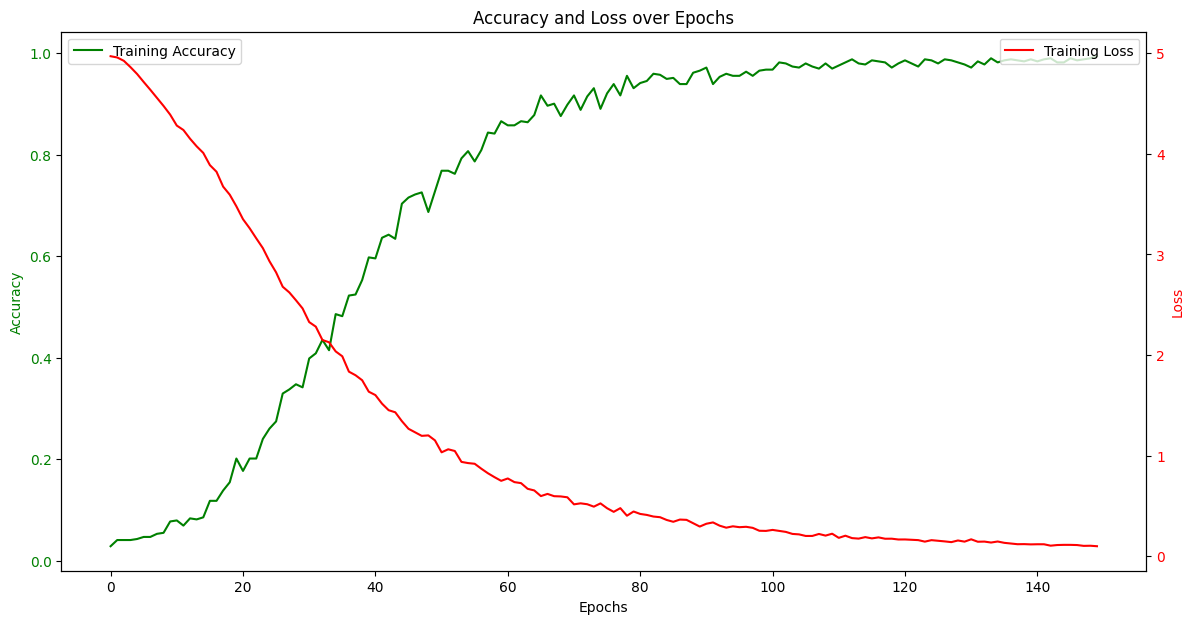

In [71]:
import matplotlib.pyplot as plt

# Membuat kanvas baru dengan ukuran 14x7
plt.figure(figsize=(14, 7))

# Membuat dua sumbu y, satu untuk akurasi dan satu untuk loss
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot akurasi pada sumbu y pertama
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='green')
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='green')
if 'val_accuracy' in history.history:
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='limegreen')
ax1.tick_params(axis='y', labelcolor='green')

# Menambahkan legenda untuk akurasi
ax1.legend(loc='upper left')

# Membuat sumbu y kedua yang berbagi sumbu x yang sama
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='red')
ax2.plot(history.history['loss'], label='Training Loss', color='red')
if 'val_loss' in history.history:
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.tick_params(axis='y', labelcolor='red')

# Menambahkan legenda untuk loss
ax2.legend(loc='upper right')

# Menambahkan judul grafik
plt.title('Accuracy and Loss over Epochs')

# Menyimpan grafik sebagai file gambar PNG
plt.savefig('grafik_accuracy_loss.png', bbox_inches='tight')

# Menampilkan grafik di layar
plt.show()

In [72]:
# Membuat prediksi dengan model yang telah dilatih
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis=1)

# Menghitung Nilai Akurasi
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.9979674796747967


# Pengujian Model

In [88]:
import time
import random
import string
import numpy as np

# Set batas probabilitas
batas_probabilitas = 0.7

while True:
    texts_p = []

    # Ambil input dari pengguna
    prediction_input = input("Kamu: ").strip()

    # Preprocessing teks: menghapus tanda baca dan mengubah menjadi lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)

    # Lematisasi
    prediction_input = lemmatizer.lemmatize(prediction_input)

    # Menambahkan input yang telah diproses ke dalam list
    texts_p.append(prediction_input)

    # Tokenisasi dan Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    # Mendapatkan output dari model
    output = model.predict(prediction_input)
    output_probabilitas = round(output.max(), 2)
    output = output.argmax()

    # Memeriksa probabilitas dan memberikan respons
    if output_probabilitas < batas_probabilitas:
        print("\nEngibot: Maaf, saya tidak mengerti pertanyaan anda.")
        response_tag = None  # Tidak ada tag valid
    else:
        response_tag = label_encoder.inverse_transform([output])[0]
        print(f"\nEngibot: {random.choice(responses[response_tag])}")

    # Waktu jeda sebelum input berikutnya
    time.sleep(0.8)
    print("=" * 60)

    # Tambahkan kondisi keluar untuk percakapan
    if response_tag in ["goodbye", "terimakasih"]:
        print("\nEngibot: Terima kasih telah berbicara dengan saya!")
        break

Kamu: hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Engibot: Halo! Aku EngiBot, siap menjawab pertanyaanmu. Apa yang kamu butuhkan?
Kamu: bagaimana cara mengisi krs?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Engibot: Untuk mengisi KRS, login ke portal mahasiswa, pilih menu KRS, tambahkan mata kuliah yang ingin diambil, dan simpan perubahan. Pastikan konsultasi dengan dosen pembimbing terlebih dahulu.
Kamu: dimana saya bisa mendapatkan transkrip nilai?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Engibot: Transkrip nilai bisa diambil melalui Portal Akademik (PAK) Mahasiswa di bagian 'Transkrip Nilai' atau bisa diambil langsung di bagian Tata Usaha (TU) Fakultas.
Kamu: bai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Engibot: See ya! Senang bisa membantumu!

Engibot: Terima kasih telah berbicara dengan saya!
